In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [6]:
#load the dataset
mcdonalds=pd.read_csv("/content/drive/MyDrive/mcdonalds.csv")

In [7]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
mcdonalds.shape

(1453, 15)

In [9]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [10]:
mcdonalds.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [11]:
# Exploring the data
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [12]:
# Select the first 11 columns and convert them to a matrix
MD_x = mcdonalds.iloc[:, 0:11]
# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)
# Calculate the column means
column_means = np.round(np.mean(MD_x, axis=0), 2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [13]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Display summary
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [14]:
# Print the principal components
print(np.round(pca.components_, 1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


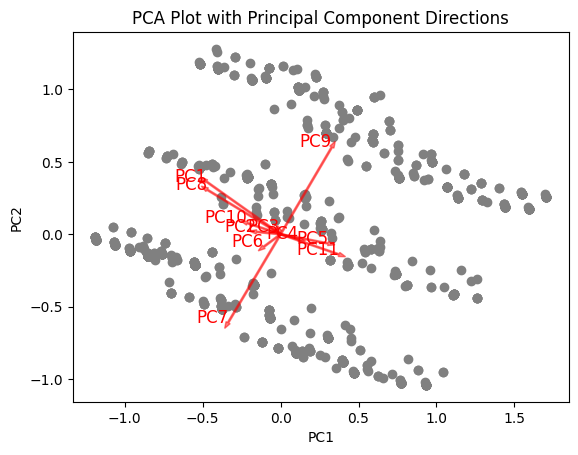

In [15]:
# Plot PCA results with principal component directions
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')

# Plot principal component directions as arrows
for i, (component1, component2) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    plt.arrow(0, 0, component1, component2, color='r', alpha=0.5, width=0.01)
    plt.text(component1, component2, f'PC{i+1}', color='r', fontsize=12, ha='right')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot with Principal Component Directions')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


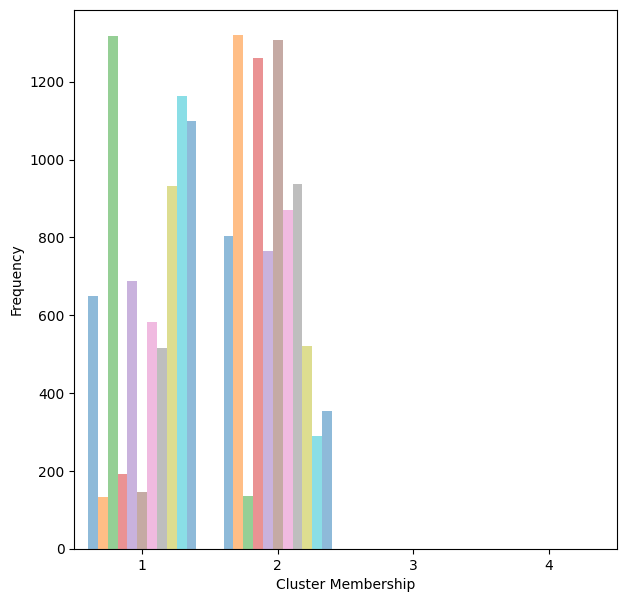

In [35]:
# Histogram of Cluster Memberships
kmeans = KMeans(n_clusters=4)
MD_kmeans_labels = kmeans.fit_predict(MD_x)

plt.hist( MD_x,bins=np.arange(-0.5, 4.5, 1), alpha=0.5)
plt.xlabel("Cluster Membership")
plt.ylabel("Frequency")
plt.xticks(range(4), range(1, 5))
plt.xlim(-0.5, 3.5)
plt.show()

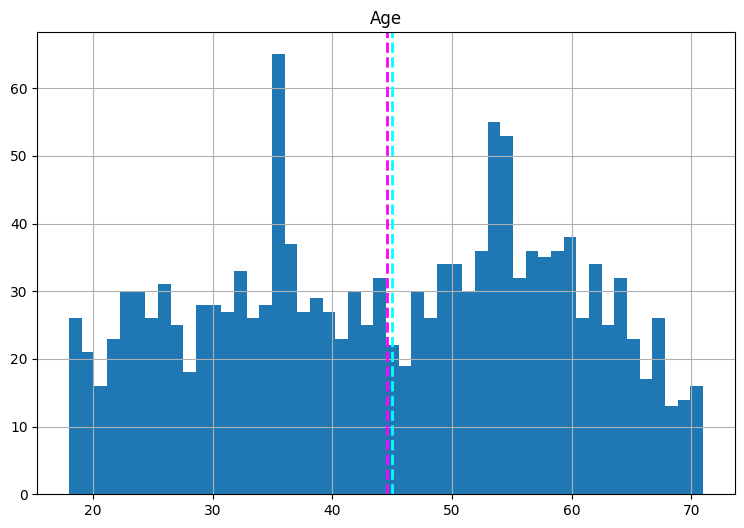

In [18]:
# distribution, skewness, mean, median of numerical features

n=['Age']

for col in n:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = mcdonalds[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()



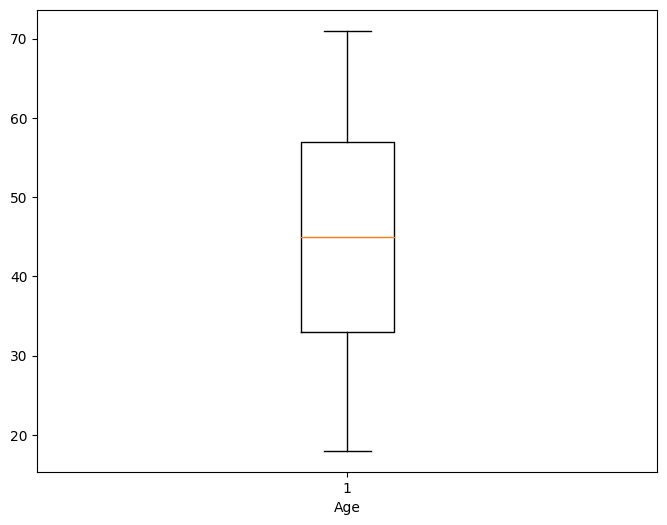

In [20]:
# checking outlier in age

# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
plt.boxplot( mcdonalds['Age'])
plt.xlabel('Age')
plt.show()

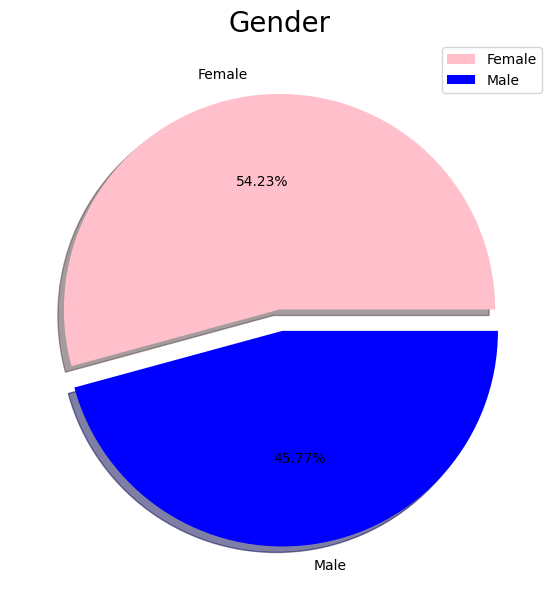

In [24]:
#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = mcdonalds['Gender'].value_counts()
colors = ['pink', 'blue']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [25]:
# Data Preprocessing
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)


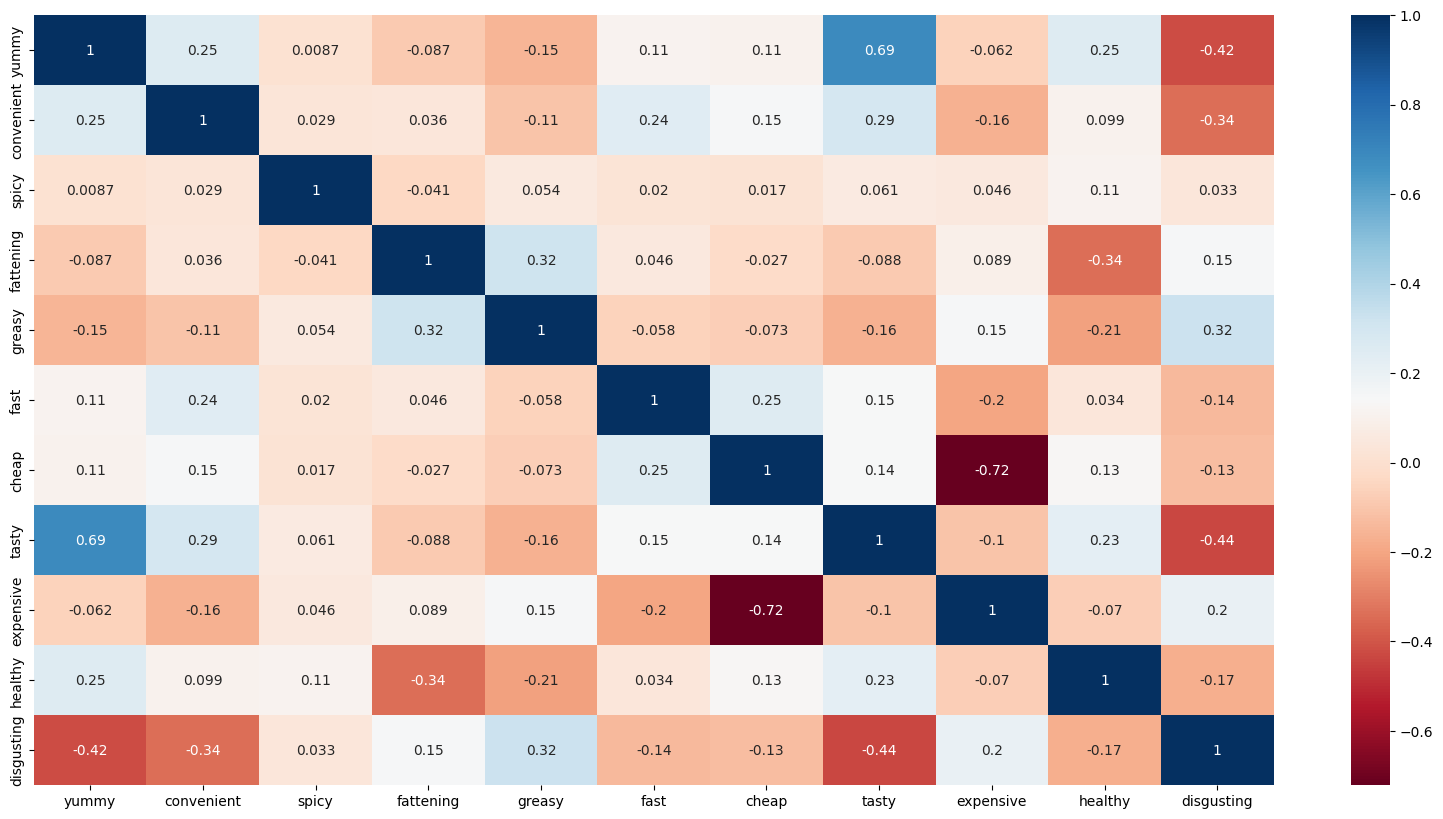

In [48]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))
correlation_matrix = MD_x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu")
plt.show()

Accuracy: 0.58
Confusion Matrix:
[[114  46]
 [ 75  56]]


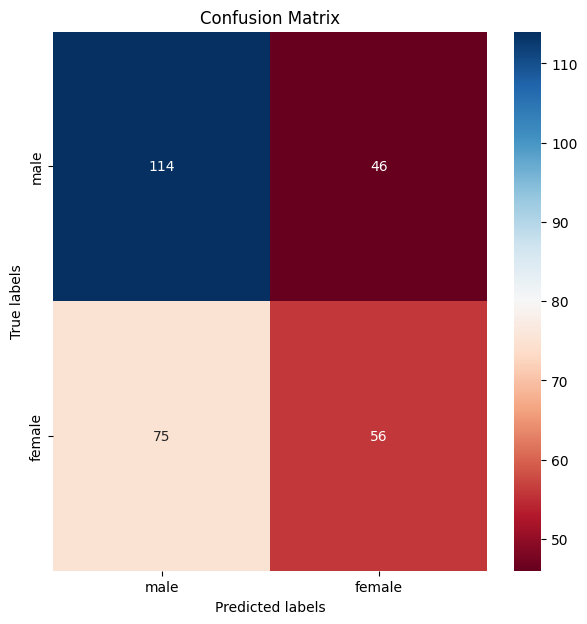

In [58]:
# Import necessary library
from sklearn.model_selection import train_test_split

MD_y = mcdonalds['Gender']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(MD_x, MD_y, test_size=0.2, random_state=12)

# Model Training
model = DecisionTreeClassifier(random_state=1234)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualization of Confusion Matrix
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, cmap="RdBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['male', 'female']); ax.yaxis.set_ticklabels(['male', 'female']);
plt.show()